### 1. Importing Libraries 

In [1]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

In [20]:
numpy - для работы с числами и списками
pandas - для работы с табличными данными
scipy - для статистических расчетов
matplotlib/seaborn - для визуализации

False

In [89]:
s = [1,2,3,4,5]
sum(s) / len(s)

3.0

In [42]:
Удалять ли пустоты? 

--Пустот много
    --Нам нужно много данных
        Лучше заполнить пропуски 
    --Нам не нужно много данных
        Можно убрать или заполнить
--Пустот мало
    Можем убрать

'1.21.6'

### 2. Importing and Exploration of the dataset

In [96]:
# loading the data and setting the unique client_id as the index::
df = pd.read_csv('loans.csv', index_col = 'client_id')

In [48]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [49]:
df.shape


(443, 7)

In [ ]:
2. Pivot_table, как проводить фильтрацию внутри таблицы, применение aggfunc. 
3. Когда и что лучше использовать groupby и pivot_table.

In [50]:
df['loan_amount']

client_id
46109    13672
46109     9794
46109    12734
46109    12518
46109    14049
         ...  
26945    12963
26945     1728
26945     9329
26945     4197
26945     3643
Name: loan_amount, Length: 443, dtype: int64

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

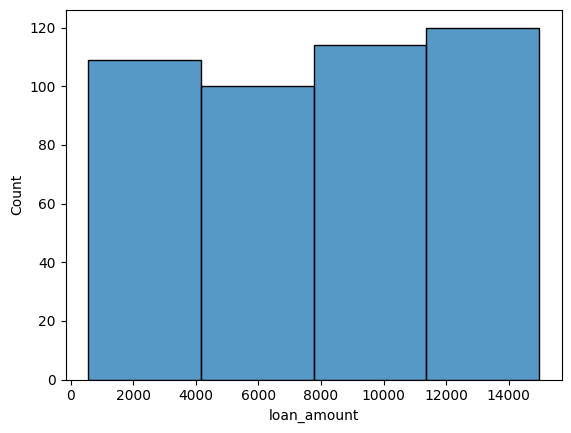

In [52]:
sns.histplot(df['loan_amount'], bins=4)

In [62]:
14971.0 - 11368

3603.0

In [63]:
7765.0 -  11368

-3603.0

In [64]:
4162.0 - 7765.0

-3603.0

In [61]:
pd.cut(df['loan_amount'], 4).unique()


[(11368.0, 14971.0], (7765.0, 11368.0], (4162.0, 7765.0], (544.588, 4162.0]]
Categories (4, interval[float64, right]): [(544.588, 4162.0] < (4162.0, 7765.0] < (7765.0, 11368.0] < (11368.0, 14971.0]]

In [65]:
pd.cut(df['loan_amount'], 5)

client_id
46109    (12088.6, 14971.0]
46109     (9206.2, 12088.6]
46109    (12088.6, 14971.0]
46109    (12088.6, 14971.0]
46109    (12088.6, 14971.0]
                ...        
26945    (12088.6, 14971.0]
26945     (544.588, 3441.4]
26945     (9206.2, 12088.6]
26945      (3441.4, 6323.8]
26945      (3441.4, 6323.8]
Name: loan_amount, Length: 443, dtype: category
Categories (5, interval[float64, right]): [(544.588, 3441.4] < (3441.4, 6323.8] < (6323.8, 9206.2] < (9206.2, 12088.6] < (12088.6, 14971.0]]

In [24]:
s = pd.Series(np.array([2, 4, 6, 8, 10]),
              )
pd.cut(s, 3)

0    (1.992, 4.667]
1    (1.992, 4.667]
2    (4.667, 7.333]
3     (7.333, 10.0]
4     (7.333, 10.0]
dtype: category
Categories (3, interval[float64, right]): [(1.992, 4.667] < (4.667, 7.333] < (7.333, 10.0]]

In [20]:
pd.qcut(df['loan_amount'].values, 5, labels=False)

array([4, 3, 4, 4, 4, 2, 1, 4, 3, 1, 0, 2, 2, 0, 3, 2, 3, 3, 3, 0, 4, 1,
       2, 3, 3, 4, 1, 1, 2, 4, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 1, 0, 0, 1,
       4, 4, 3, 2, 4, 1, 2, 1, 3, 2, 0, 3, 4, 3, 3, 0, 0, 2, 4, 1, 1, 2,
       2, 2, 4, 2, 4, 3, 0, 3, 2, 2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 3, 2,
       4, 0, 1, 0, 4, 3, 1, 3, 3, 1, 4, 1, 4, 3, 1, 3, 4, 4, 0, 2, 0, 0,
       1, 0, 3, 1, 0, 4, 3, 0, 4, 2, 3, 0, 3, 0, 2, 0, 3, 1, 1, 3, 0, 4,
       0, 1, 0, 1, 0, 2, 4, 0, 2, 4, 0, 3, 2, 1, 1, 1, 0, 1, 3, 1, 3, 4,
       0, 1, 1, 3, 1, 3, 4, 4, 3, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 3, 1,
       1, 0, 3, 2, 2, 4, 0, 4, 1, 0, 2, 2, 0, 2, 1, 3, 3, 4, 1, 1, 3, 0,
       4, 2, 1, 4, 1, 3, 4, 4, 0, 1, 0, 0, 0, 1, 2, 4, 1, 1, 2, 0, 2, 2,
       3, 2, 0, 0, 4, 1, 0, 0, 4, 2, 0, 1, 0, 4, 1, 4, 0, 4, 4, 3, 1, 0,
       2, 3, 0, 2, 4, 4, 1, 4, 1, 3, 4, 2, 1, 4, 4, 2, 4, 3, 1, 2, 1, 2,
       2, 2, 1, 4, 3, 0, 2, 1, 1, 2, 2, 1, 0, 4, 0, 3, 1, 1, 1, 3, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 1, 4, 3, 2, 1, 0, 3, 3,

In [66]:
df_test = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [67]:
df_test

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [68]:
df_test_concat = pd.concat([df_test, df_test, df_test])

In [69]:
df_test_concat.head()

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6


In [71]:
df_test_concat[['A', 'B']].drop_duplicates()

,A,B
0,foo,one
3,foo,two
5,bar,one
7,bar,two


In [72]:
df_test_concat[['C']].drop_duplicates()

,C
0,small
1,large


In [74]:
df_test_concat[
    (df_test_concat['C'] == 'small')
    & (df_test_concat['A'] == 'foo')
    & (df_test_concat['B'] == 'two')
]

,A,B,C,D,E
3,foo,two,small,3,5
4,foo,two,small,3,6
3,foo,two,small,3,5
4,foo,two,small,3,6
3,foo,two,small,3,5
4,foo,two,small,3,6


In [87]:
def handler(s):
    return np.sum(s)

In [88]:
x = pd.pivot_table(
    df_test_concat,
    values='D',
    index=['A', 'B'],
    columns=['C'],
    aggfunc=handler,
    fill_value=0
)
x

C        large  small
A   B                
bar one     12     15
    two     21     18
foo one     12      3
    two      0     18

In [44]:
x[x['large'] >= 8]

C        large  small
A   B                
bar one      8     10
    two     14     12
foo one      8      2

In [3]:
# showing the first 5 rows of the dataset:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
df

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65


In [5]:
# To check the Dimensions of the dataset:
df.shape

(443, 7)

In [97]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


### 3. Checking the datatypes of the columns

In [151]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type

In [103]:
# loan_id:
df['loan_id'] = df['loan_id'].astype('object')

# repaid:
df['repaid'] = df['repaid'].astype('category')

In [104]:
# loan_start:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')

# loan_end:
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   loan_type    443 non-null    object        
 1   loan_amount  443 non-null    int64         
 2   repaid       443 non-null    category      
 3   loan_id      443 non-null    object        
 4   loan_start   443 non-null    datetime64[ns]
 5   loan_end     443 non-null    datetime64[ns]
 6   rate         443 non-null    float64       
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 24.8+ KB


#### Checking the datatypes again:

In [106]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

### 5. Summary Statistics of the data

In [107]:
# Summary Statistics for Numerical data:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [109]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [108]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [134]:
df_test_concat['mask'] = df_test_concat.duplicated()
df_test_concat

,A,B,C,D,E,mask
0,foo,one,small,1,2,False
1,foo,one,large,2,4,False
2,foo,one,large,2,5,False
3,foo,two,small,3,5,False
4,foo,two,small,3,6,False
5,bar,one,large,4,6,False
6,bar,one,small,5,8,False
7,bar,two,small,6,9,False
8,bar,two,large,7,9,False
0,foo,one,small,1,2,True


### 6. Missing Values

In [23]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [113]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [110]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

There are no missing values in the data. 

Sk-learn library has an in-built function called Iterative Imputer to impute the missing values. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

----------------

### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

In [172]:
df['loan_amount'].quantile(0.75) - df['loan_amount'].quantile(0.25)

7506.5

In [ ]:
IQR = Q75-Q25

In [116]:
df['loan_amount']

client_id
46109    13672
46109     9794
46109    12734
46109    12518
46109    14049
         ...  
26945    12963
26945     1728
26945     9329
26945     4197
26945     3643
Name: loan_amount, Length: 443, dtype: int64

In [ ]:
IQR = Q75 - Q25

bottom = max(Q25 - 1.5*IQR, min_value)
top = min(Q75 + 1.5*IQR, max_value)

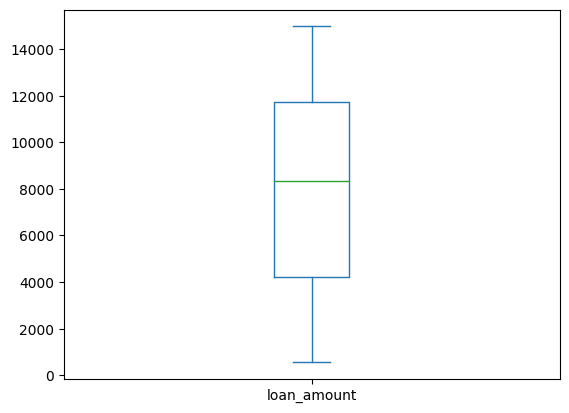

In [114]:
df['loan_amount'].plot(kind='box');

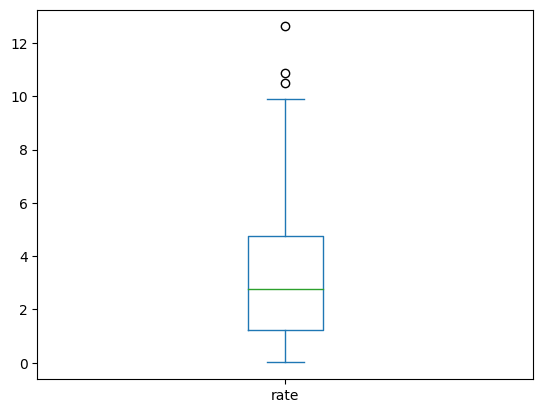

In [117]:
# For rate 
df['rate'].plot(kind='box')
plt.show()

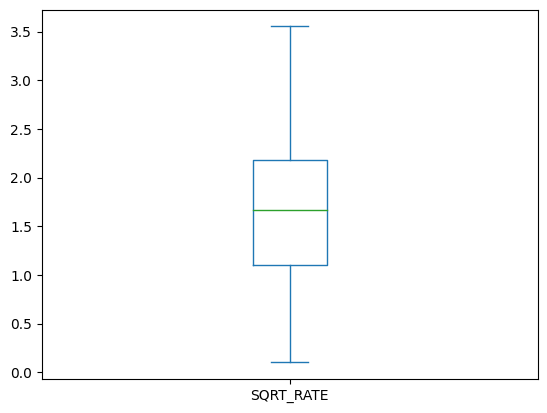

In [120]:
# For loan_amount 
df['SQRT_RATE'].plot(kind='box')
plt.show()

We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here. 

### 8. Transformation

### 8a. SQRT transformation 

In [118]:
df['SQRT_RATE'] = df['rate']**0.5

In [119]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [30]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [121]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039


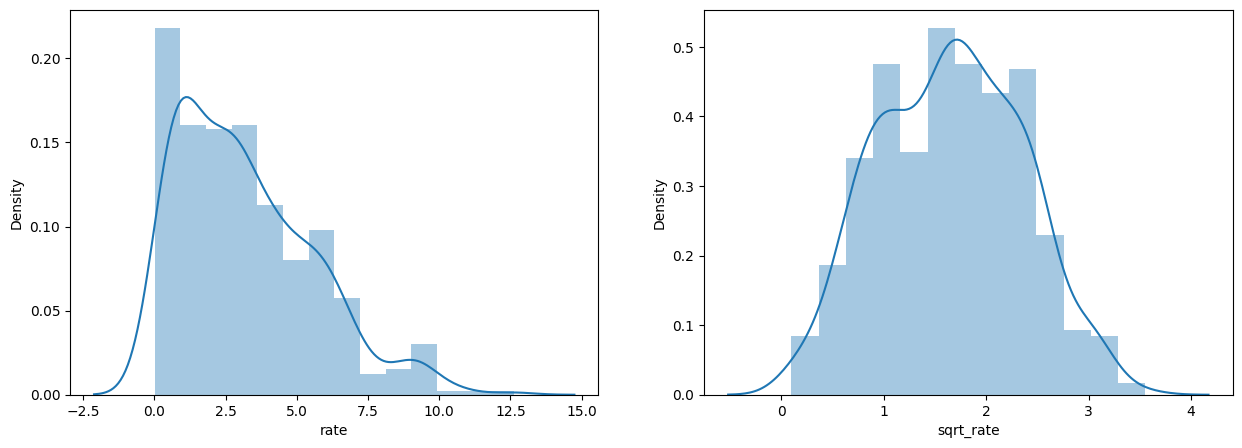

In [122]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()


### Result:

The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.

### 8b. Log Transformation

In [123]:
df['Log Rate'] = np.log(df['rate'])

In [124]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [125]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewness of the LOG transformed data is {}".format(df['Log Rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['Log Rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewness of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


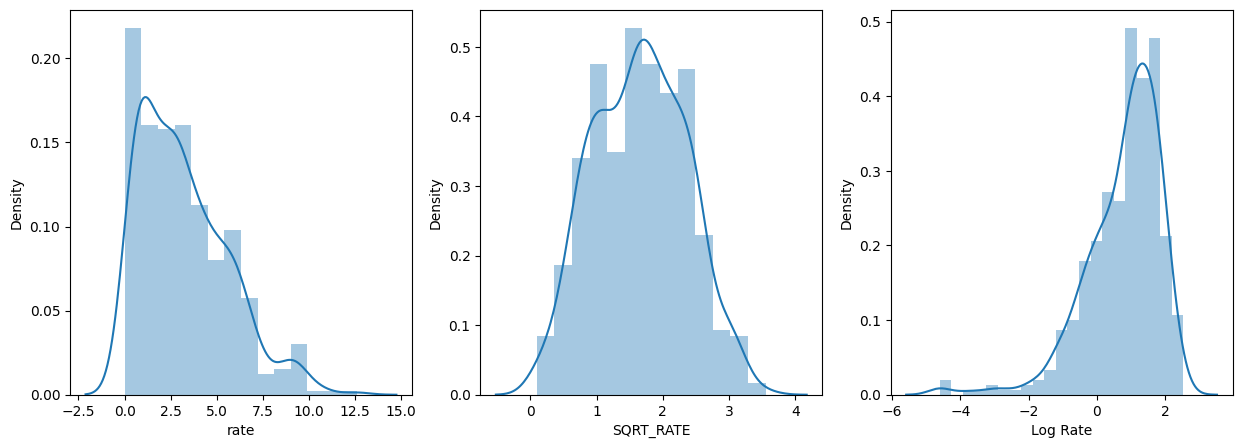

In [126]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

### Inference:

Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable. 

In [65]:
## Using Lambda function :

df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [66]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,LOG_Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.141033


There are other transformations available also called BoxCox. There is an inbuilt function in Sci-kit Learn library called PowerTransformer for this which can also be called to transform the data. We'll see how it works below. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html


-----------

### Outliers Treatment using Capping Approach

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [101]:
# loading the dataset and setting client id as index

df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [102]:
# loan_id:

df1['loan_id'] = df1['loan_id'].astype('object')

# repaid:

df1['repaid'] = df1['repaid'].astype('category')

In [103]:
# loan_start:

df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')


# loan_end:

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [195]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.3 MB/s eta 0:00:001.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
stats.mannwhitneyu

In [188]:
from scipy.stats import ttest_ind, mannwhitneyu

In [104]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

In [189]:
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)>

#### Using SciPy Library to calculate the Z-Score:

<AxesSubplot:xlabel='rate', ylabel='Density'>

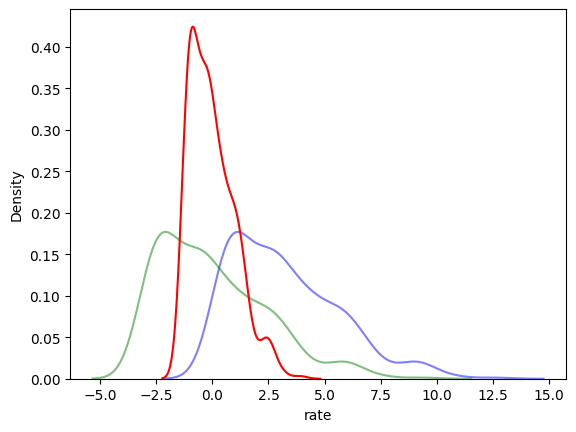

In [118]:
sns.kdeplot(df1['rate'], color='blue', alpha=0.5)
sns.kdeplot((df1['rate'] - df1['rate'].mean()), color='green', alpha=0.5)
sns.kdeplot((df1['rate'] - df1['rate'].mean()) / df1['rate'].std(), color='red', alpha=1)

<AxesSubplot:xlabel='rate', ylabel='Count'>

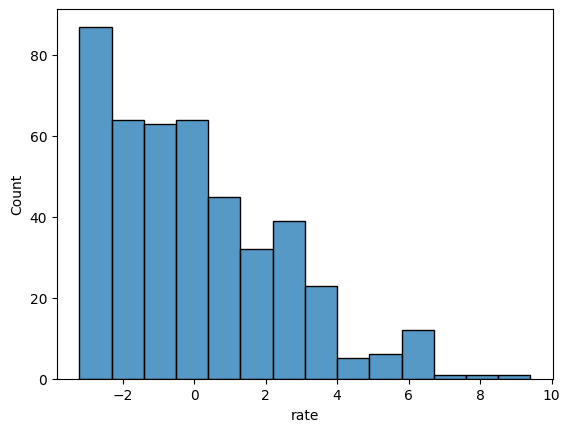

In [105]:
# Creating new variable with Z-score of each record:
df1['ZR'] = stats.zscore(df1['rate'])

In [106]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [120]:
df1.shape

(443, 8)

In [123]:
# Combined Lower limit and Upper limit:

df1[(df1['ZR'] < -3) | (df1['ZR'] > 3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [82]:
# count of outliers:

df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [124]:
### Cleaned Data: without outliers so z>-3 and z< +3

df2 = df1[(df1['ZR'] > -3) & (df1['ZR'] < 3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [125]:
df1.shape

(443, 8)

In [126]:
df2.shape

(440, 9)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [128]:
df3 = df2.copy()

In [129]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


-----------

### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.

In [131]:
# finding the Quantiles:

Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-3.9762499999999994

9.87375

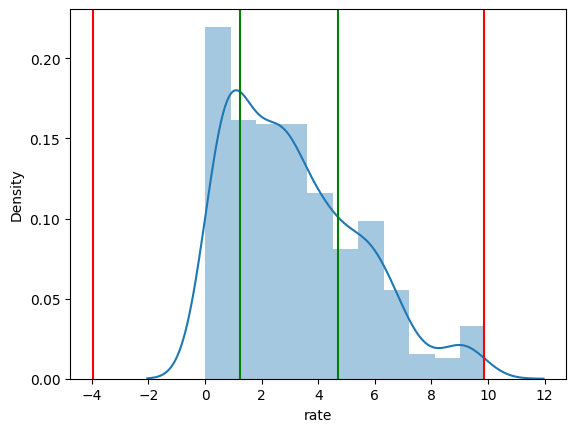

In [132]:
## Plot

sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [133]:
# Find count of Outliers wrt IQR

df3[(df3.rate < LC) | (df3.rate > UC)].reset_index(drop=True)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [134]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

1

In [135]:
## Store the clean data wrt IQR:

df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [136]:
df3.shape

(440, 8)

In [137]:
df4.shape

(439, 8)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [142]:
df.rate

client_id
46109    2.15
46109    1.25
46109    0.68
46109    1.24
46109    3.13
         ... 
26945    2.46
26945    5.27
26945    5.65
26945    4.50
26945    0.13
Name: rate, Length: 443, dtype: float64

<AxesSubplot:>

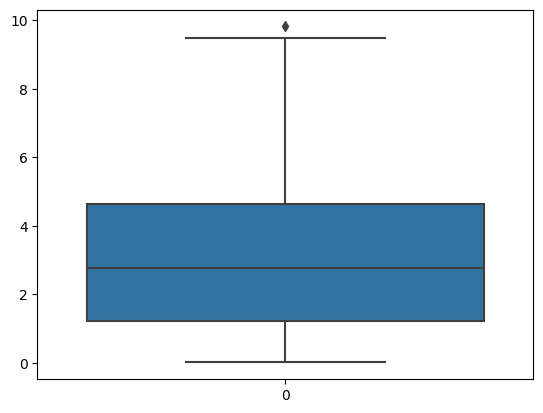

In [147]:
## Box Plot for rate--- based on IQR Method

sns.boxplot(df4.rate.values)
# plt.show()

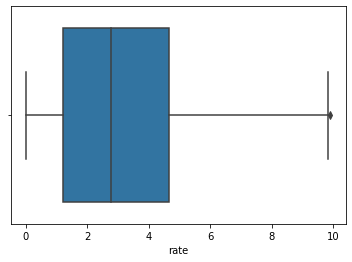

In [110]:
# Box Plot for rate --- based on Z-score cleaned data 

sns.boxplot(df2.rate)
plt.show()

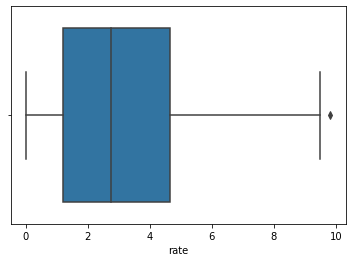

In [108]:
# Box Plot for rate --- based on IQR cleaned data 

sns.boxplot(df4.rate)
plt.show()

-------------------

### 9. Scaling the Numerical Features

There are two ways to scale the data: 

1) Standardization (Z-Score)\
2) Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.

### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:

In [148]:
# for Rate :
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818182

In [149]:
std_rate = df3['rate'].std()
std_rate

2.3079474188229154

In [150]:
# Step 1 : transform using Z-score
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [151]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [152]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df3.rate.skew()))
print("The kurtosis for the original data is {}.".format(df3.rate.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))

The skewness for the original data is 0.7594062707815686.
The kurtosis for the original data is -0.05964248048746912.

The skewness for the Zscore Scaled column is 0.7594062707815691.
The kurtosis for the Zscore Scaled columns is -0.05964248048746823.


In [153]:
# For Loan_amount:
avg_LA = df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [154]:
std_LA = df3['loan_amount'].std()
std_LA

4179.435966237437

In [155]:
# Step 1 : transform using Z-score
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [156]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [157]:
# checking if the skewness and kurtosis post scaling or not:

# For Loan_amount:

print("The skewness for the original data is {}.".format(df3.loan_amount.skew()))
print("The kurtosis for the original data is {}.".format(df3.loan_amount.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The kurtosis for the original data is -1.2354309429278456.

The skewness for the Zscore Scaled column is -0.04678765472024289.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.


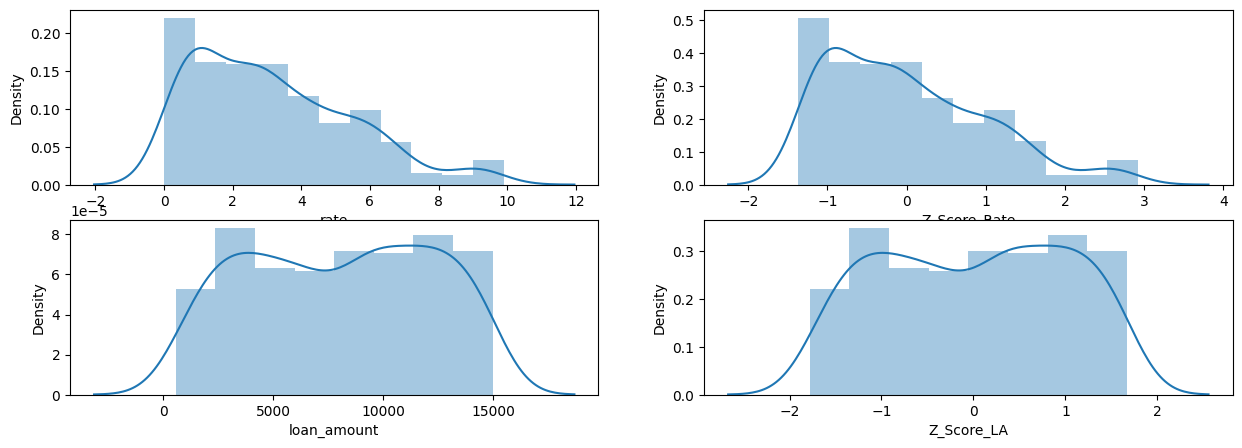

In [161]:
# Distribution of the columns
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])


plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is:
Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1) Comparison between variables is easier\
2) Computation power is more efficient and less time consuming.

#### By SkLearn:

Documentation for Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [162]:
# Loans data:

df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996


In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [166]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

### 6b.  Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:

In [167]:
# ForeRate:
min_rate = df4.rate.min()
min_rate

0.01

In [168]:
max_rate = df4.rate.max()
max_rate

9.91

In [169]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/ (max_rate - min_rate)

In [170]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.rate.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.rate.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.kurt()))

The skewness for the original data is 0.7594062707815686.
The skewness for the Zscore Scaled column is 0.7594062707815691.
The skewness for the Min Max Scaled Data is 0.7594062707815686.

The kurtosis for the original data is -0.05964248048746912.
The kurtosis for the Zscore Scaled columns is -0.05964248048746823.
The kurtosis for the Min Max Scaled Data is -0.05964248048746823.


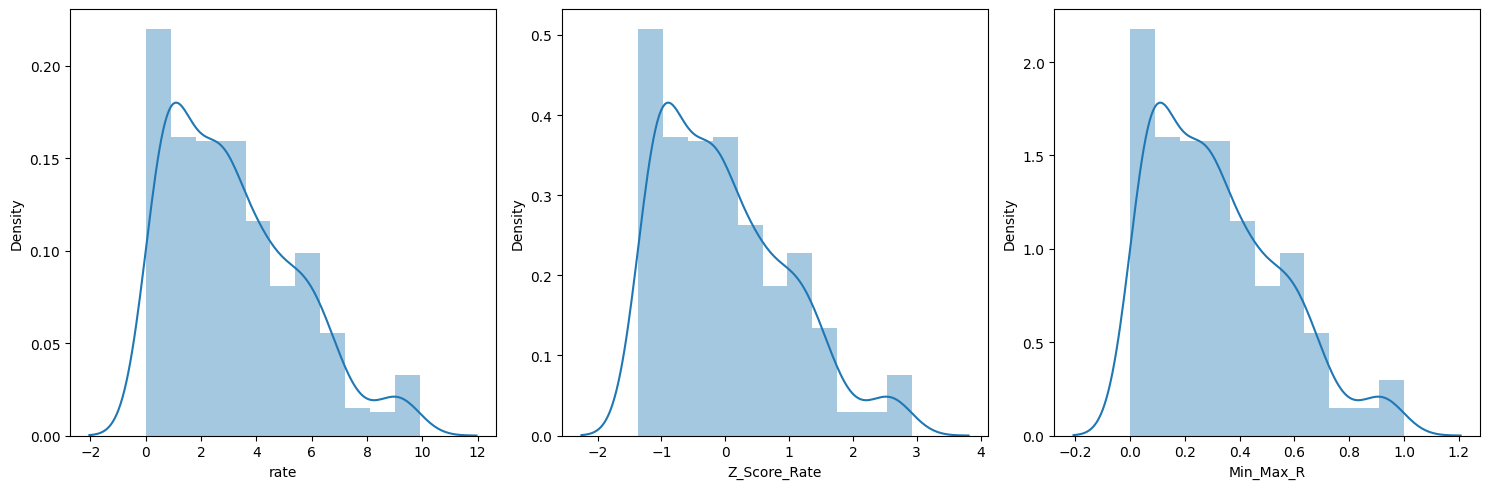

In [171]:
# Distribution of the columns

# For Rate

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [172]:
# For Loan_amount:
min_LA = df4.loan_amount.min()
min_LA

559

In [173]:
max_LA = df4.loan_amount.max()
max_LA

14971

In [174]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/ (max_LA - min_LA)

In [175]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.loan_amount.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.loan_amount.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The skewness for the Zscore Scaled column is -0.04678765472024289.
The skewness for the Min Max Scaled Data is -0.04678765472024256.

The kurtosis for the original data is -1.2354309429278456.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.
The kurtosis for the Min Max Scaled Data is -1.2354309429278452.


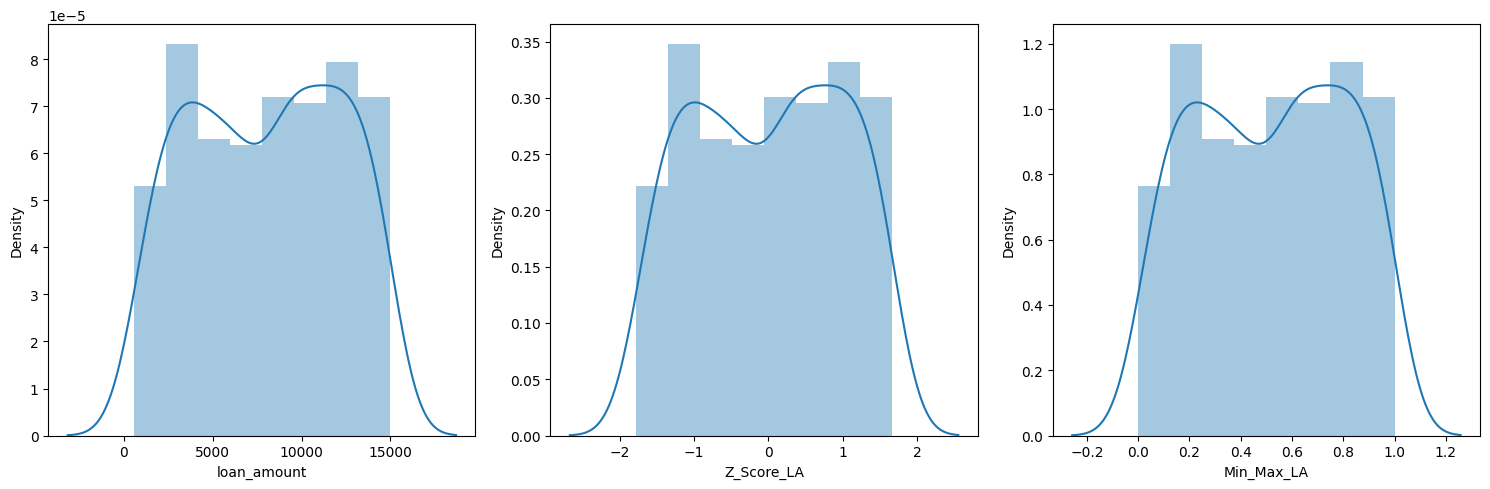

In [176]:
# Distribution of the columns

# For Loan_Amount

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

#### By Sklearn:

Documentation for Min Max Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

### Few things to keep in mind:

With Scaling all three - Skewness, Kurtosis and distribution remain same so there is no impact on outliers as well.

------------------

### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using: 

1) pd.get_dummies\
2) sklearn's in-built function of OneHotEncoder and LabelEncoder

In [180]:
# Loans data:

df_loans = df3.copy()

In [181]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [182]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [183]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [188]:
# Repaid is also a categoriy columns and creating dummies for loan_type
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

### 1) pd.get_dummies approach:

In [244]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

,credit,home,other
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,0,0


### 2. OneHot Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [189]:
from sklearn.preprocessing import OneHotEncoder

In [191]:
OE_tips = OneHotEncoder(drop ='first').fit(df_loans[['loan_type']])
OE_tips.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

### 3. Label Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
LE = LabelEncoder()

LE_tips = LE.fit(df_loans[['loan_type']])

In [194]:
LE_tips.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [196]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

array([3, 0, 2, 1], dtype=int64)

In [197]:
# Inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

array(['credit', 'home', 'other', 'cash'], dtype=object)

----------------

### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan

In [218]:
import datetime as dt

In [219]:
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']

In [220]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [221]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

The number of days in the tenure are currently in TimeDelta, we want it integer hence will do the conversion as follows:

In [226]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

0      613
1      635
2      519
3      879
4      684
      ... 
435    928
436    511
437    948
438    633
439    638
Name: loan_tenure, Length: 440, dtype: int64

In [228]:
## Tenure in number of Years:

df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
435    2.542466
436    1.400000
437    2.597260
438    1.734247
439    1.747945
Name: loan_tenure, Length: 440, dtype: float64

### 12. Training and Testing data

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [198]:
from sklearn.model_selection import train_test_split

In [229]:
## Splitting for X and Y variables:

Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [230]:
# Independent Variable

X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [231]:
# Dependent or Target Variable

Y.head()

0    13672
1     9794
2    12734
3    12518
4    14049
Name: loan_amount, dtype: int64

In [240]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (352, 8)
The shape of X_test is: (88, 8)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)


To statistically test if the train and test representative of the overall data, would compute the Median for the independent variables for both the test and train sets.

In [241]:
# median for y_train
median_y_train = Y_train.median()

# median for y_test
median_y_test = Y_test.median()

In [242]:
print('The median for Y Train variables is:',median_y_train)

The median for Y Train variables is: 8412.5


In [243]:
print('The median for Y Test variables is:',median_y_test)

The median for Y Test variables is: 7673.0


### Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both y_train and y_test are similar.

-----------------